# Simple Linear Regression

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

read and analysis data

In [7]:
df=pd.read_csv('11701Students.csv')
df.head()

,Hours,Marks
0,0,34
1,1,36
2,1,33
3,1,39
4,1,42


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Hours   30 non-null     int64
 1   Marks   30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [9]:
df.describe()

,Hours,Marks
count,30.000000,30.000000
mean,5.200000,61.400000
std,3.188341,17.734828
min,0.000000,33.000000
25%,3.000000,45.250000
50%,5.000000,60.000000
75%,7.750000,77.000000
max,11.000000,89.000000


In [11]:
mean_of_hours=df['Hours'].mean()
mean_of_hours

5.2

In [12]:
df.loc[df['Hours']==0]=mean_of_hours

In [14]:
df.describe()

,Hours,Marks
count,30.000000,30.000000
mean,5.373333,60.440000
std,3.033484,19.914673
min,1.000000,5.200000
25%,3.000000,45.250000
50%,5.100000,60.000000
75%,7.750000,77.000000
max,11.000000,89.000000


In [44]:
x=df['Hours'].values.reshape(-1,1)
y=df['Marks']

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3)

In [46]:
x_train.shape

(21, 1)

In [47]:
x_test.shape

(9, 1)

In [48]:
y_train.shape

(21,)

In [49]:
y_test.shape

(9,)

train data

In [50]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
y_hat=lr.predict(x_test)
y_hat

array([73.9173913 , 79.02608696, 63.7       , 38.15652174, 53.4826087 ,
       53.4826087 , 43.26521739, 84.13478261, 58.59130435])

In [52]:
y_test

23    89.0
25    67.0
16    62.0
1     36.0
12    55.0
11    59.0
6     38.0
27    81.0
15    59.0
Name: Marks, dtype: float64

calculate R2

In [53]:
lr.score(x_train, y_train)

0.547607047556784

In [54]:
lr.score(x_test,y_test)

0.8138490777267533

calculate Root mean square error

In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
np.sqrt(mean_squared_error(y_test, y_hat))

7.071955018527688

test model

In [61]:
lr.predict([[8.5]])

array([76.47173913])

In [64]:
lr.predict([[12]])

array([94.35217391])

Get model parameters

In [65]:
lr.coef_

array([5.10869565])

In [66]:
lr.intercept_

33.04782608695652

Visualization

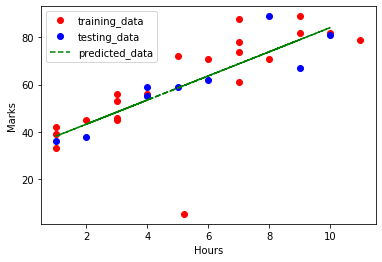

In [68]:
plt.plot(x_train, y_train, 'ro', label='training_data')
plt.plot(x_test, y_test, 'bo', label='testing_data')
plt.plot(x_test, y_hat, 'g--', label='predicted_data')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.legend()